In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

In [7]:
df_raw =pd.read_csv('../data/raw/beer_reviews.csv')

In [8]:
df = df_raw.sample(n=5000, random_state=42)

In [9]:
df.head()

brewery_id                   brewery_name  review_time  \
859964        13307                  Mikkeller ApS   1317606533   
581443          126         Pete's Brewing Company   1195281294   
1270456         203  Greene King / Morland Brewery   1224109943   
477415          167              Brewery Lobkowicz   1070489226   
1408999         664            Wells & Young's Ltd   1172208746   

         review_overall  review_aroma  review_appearance review_profilename  \
859964              4.0           4.5                4.5             Ghenna   
581443              2.5           3.0                3.5             hwwty4   
1270456             4.0           3.5                4.0            dsa7783   
477415              4.5           4.0                3.5         TastyTaste   
1408999             5.0           4.0                5.0        BadRockBeer   

                  beer_style  review_palate  review_taste  \
859964   American Barleywine            3.5           3.5   
581443             Cream Ale            3.0           2.5   
1270456     English Pale Ale            3.5           3.5   
477415        Czech Pilsener            4.0           4.5   
1408999   Milk / Sweet Stout            5.0           5.0   

                                  beer_name  beer_abv  beer_beerid  
859964                            Big Worst      18.5        56831  
581443   Pete's Wicked Wanderlust Cream Ale       5.6        19950  
1270456                           Abbot Ale       5.0          910  
477415                     Lobkowicz Knight       4.8          444  
1408999      Young's Double Chocolate Stout       5.2           73

In [10]:
df.shape

(5000, 13)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 859964 to 782228
Data columns (total 13 columns):
brewery_id            5000 non-null int64
brewery_name          5000 non-null object
review_time           5000 non-null int64
review_overall        5000 non-null float64
review_aroma          5000 non-null float64
review_appearance     5000 non-null float64
review_profilename    4999 non-null object
beer_style            5000 non-null object
review_palate         5000 non-null float64
review_taste          5000 non-null float64
beer_name             5000 non-null object
beer_abv              4796 non-null float64
beer_beerid           5000 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 546.9+ KB


In [92]:
len(df.columns)

13

In [12]:
df.describe()

brewery_id   review_time  review_overall  review_aroma  \
count   5000.000000  5.000000e+03     5000.000000   5000.000000   
mean    3080.018400  1.225571e+09        3.829000      3.748400   
std     5493.435358  7.631328e+07        0.712503      0.687671   
min        1.000000  9.049536e+08        1.000000      1.000000   
25%      144.000000  1.177335e+09        3.500000      3.500000   
50%      447.000000  1.242201e+09        4.000000      4.000000   
75%     2372.000000  1.289101e+09        4.500000      4.000000   
max    27681.000000  1.326252e+09        5.000000      5.000000   

       review_appearance  review_palate  review_taste     beer_abv  \
count        5000.000000    5000.000000   5000.000000  4796.000000   
mean            3.857400       3.762300      3.802600     7.033021   
std             0.619146       0.678263      0.727763     2.350990   
min             1.000000       1.000000      1.000000     0.400000   
25%             3.500000       3.500000      3.500000     5.200000   
50%             4.000000       4.000000      4.000000     6.500000   
75%             4.000000       4.000000      4.500000     8.500000   
max             5.000000       5.000000      5.000000    32.000000   

        beer_beerid  
count   5000.000000  
mean   21807.379800  
std    21783.579993  
min        5.000000  
25%     1836.000000  
50%    14063.000000  
75%    39753.250000  
max    76974.000000

In [82]:
class_counts = df['beer_style'].value_counts()
print(class_counts)

American IPA                        420
American Double / Imperial IPA      266
American Pale Ale (APA)             191
Russian Imperial Stout              177
American Double / Imperial Stout    177
                                   ... 
Kvass                                 2
Roggenbier                            2
Faro                                  1
Black & Tan                           1
Sahti                                 1
Name: beer_style, Length: 103, dtype: int64


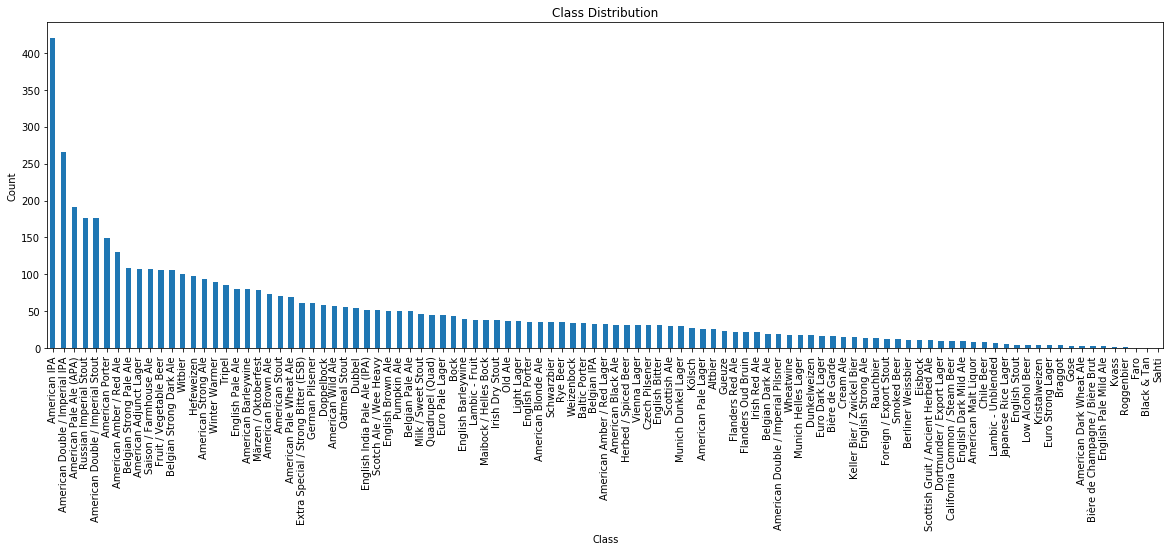

In [87]:
class_counts = df['beer_style'].value_counts()

# Plotting the class distribution with adjusted x-axis length
plt.figure(figsize=(20, 6))  # Adjust the figsize as needed
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [90]:
df['beer_style'].nunique()

103

## Prepare Data

In [38]:
df_cleaned = df.copy()

In [39]:
df_cleaned.drop('brewery_id', axis=1, inplace=True)

In [40]:
df_cleaned.dropna(inplace=True)

In [41]:
df_cleaned.reset_index(drop=True, inplace=True)

In [42]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [43]:
num_cols = ['review_time', 'review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv', 'beer_beerid']

In [44]:
sc = StandardScaler()
df_cleaned[num_cols] = sc.fit_transform(df_cleaned[num_cols])

In [45]:
cat_cols = ['brewery_name', 'review_profilename', 'beer_style', 'beer_name']

In [46]:
#ohe = OneHotEncoder(sparse=False)
#X_cat = pd.DataFrame(ohe.fit_transform(df_cleaned[cat_cols]))
#X_cat.columns = ohe.get_feature_names(cat_cols)

In [48]:
# creating instance of labelencoder
le = LabelEncoder()
X_cat = pd.DataFrame()

for col in cat_cols:
    X_cat[col] = le.fit_transform(df_cleaned[col])

X_cat.columns = cat_cols

In [49]:
df_cleaned.drop(cat_cols, axis=1, inplace=True)

In [50]:
X = pd.concat([df_cleaned, X_cat], axis=1)

In [51]:
X.head()

review_time  review_overall  review_aroma  review_appearance  \
0     1.203087        0.227275      1.080918           1.031792   
1    -0.424306       -1.892927     -1.110935          -0.598875   
2    -0.040775        0.227275     -0.380317           0.216459   
3    -2.084517        0.934009      0.350300          -0.598875   
4    -0.731259        1.640743      0.350300           1.847125   

   review_palate  review_taste  beer_abv  beer_beerid  brewery_name  \
0      -0.402764     -0.436742  4.877682     1.614101           598   
1      -1.143560     -1.820409 -0.609464    -0.078491           678   
2      -0.402764     -0.436742 -0.864680    -0.952300           422   
3       0.338031      0.946924 -0.949753    -0.973686           173   
4       1.819622      1.638758 -0.779608    -0.990713           918   

   review_profilename  beer_style  beer_name  
0                 433           4        332  
1                1759          35       1891  
2                1575          47         52  
3                 988          36       1495  
4                  84          78       2842

In [79]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4795 entries, 0 to 4794
Data columns (total 12 columns):
review_time           4795 non-null float64
review_overall        4795 non-null float64
review_aroma          4795 non-null float64
review_appearance     4795 non-null float64
review_palate         4795 non-null float64
review_taste          4795 non-null float64
beer_abv              4795 non-null float64
beer_beerid           4795 non-null float64
brewery_name          4795 non-null int64
review_profilename    4795 non-null int64
beer_style            4795 non-null int64
beer_name             4795 non-null int64
dtypes: float64(8), int64(4)
memory usage: 449.7 KB


In [52]:
from src.data.sets import split_sets_random, save_sets
X_train, y_train, X_val, y_val, X_test, y_test = split_sets_random(X, target_col='beer_style', test_ratio=0.2, to_numpy=True)

In [54]:
#Save sets into data/processed
from src.data.sets import save_sets
save_sets(X_train, y_train, X_val, y_val, X_test, y_test, path='../data/processed/')

In [55]:
#Print the dimensions of `X_train`, `X_val`, `X_test`
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(2877, 11)
(959, 11)
(959, 11)


In [78]:
print(X['beer_style'].unique())

[  4  35  47  36  78  85  60  79  84  33  16  61   2 101  93  24  42  12
  25  96  22  66  64   3  99  19  11  88  73   0   9  69   7  39  97 102
  46   1  77  26  53  58  17  55  43  14  18  27 100  81  57  94  15  20
  34  92  91  10  44  75  72  80  23   5  52  82  37  31  83  68  13  49
  21  65  63  29   6  59  41  40  89  45  95  62  67  71  98  76  74  86
  51  38  30  70  48  54  28  87   8  50  32  56  90]


In [94]:
len(X.columns)

12

## Baseline Model

In [56]:
from src.models.null import NullModel
baseline_model = NullModel()
y_base = baseline_model.fit_predict(y_train)

In [57]:
from src.models.performance import print_reg_perf
print_reg_perf(y_base, y_train, set_name='Training')

RMSE Training: 33.517116095747795
MAE Training: 30.161648078699752


In [60]:
## Define Architecture
import torch
import torch.nn as nn
import torch.nn.functional as F

In [61]:
from src.models.pytorch import PytorchRegression
model = PytorchRegression(X_train.shape[1])

In [62]:
from src.models.pytorch import get_device
device = get_device()
model.to(device)

PytorchRegression(
  (layer_1): Linear(in_features=11, out_features=128, bias=True)
  (layer_out): Linear(in_features=128, out_features=1, bias=True)
)

In [63]:
#Print architecture of model
print(model)

PytorchRegression(
  (layer_1): Linear(in_features=11, out_features=128, bias=True)
  (layer_out): Linear(in_features=128, out_features=1, bias=True)
)


## Create Dataloader

In [65]:
from torch.utils.data import Dataset, DataLoader
from src.models.pytorch import PytorchDataset

train_dataset = PytorchDataset(X=X_train, y=y_train)
val_dataset = PytorchDataset(X=X_val, y=y_val)
test_dataset = PytorchDataset(X=X_test, y=y_test)

In [66]:
from torch.utils.data import DataLoader

## Train model

In [71]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [67]:
def train_regression(train_data, model, criterion, optimizer, batch_size, device, scheduler=None, collate_fn=None):
    """Train a Pytorch regresssion model

    Parameters
    ----------
    train_data : torch.utils.data.Dataset
        Pytorch dataset
    model: torch.nn.Module
        Pytorch Model
    criterion: function
        Loss function
    optimizer: torch.optim
        Optimizer
    bacth_size : int
        Number of observations per batch
    device : str
        Name of the device used for the model
    scheduler : torch.optim.lr_scheduler
        Pytorch Scheduler used for updating learning rate
    collate_fn : function
        Function defining required pre-processing steps

    Returns
    -------
    Float
        Loss score
    Float:
        RMSE Score
    """
    
    # Set model to training mode
    model.train()
    train_loss = 0

    # Create data loader
    data = DataLoader(train_data, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
    
    # Iterate through data by batch of observations
    for feature, target_class in data:
        
        # Reset gradients
        optimizer.zero_grad()
        
        # Load data to specified device
        feature, target_class = feature.to(device), target_class.to(device)
        
        # Make predictions
        output = model(feature)
        
        # Calculate loss for given batch
        loss = criterion(output, target_class)
        
        # Calculate global loss
        train_loss += loss.item()
        
        # Calculate gradients
        loss.backward()
        
        # Update Weights
        optimizer.step()
        
    # Adjust the learning rate
    if scheduler:
        scheduler.step()

    return train_loss / len(train_data), np.sqrt(train_loss / len(train_data))

In [68]:
def test_regression(test_data, model, criterion, batch_size, device, collate_fn=None):
    """Calculate performance of a Pytorch regresssion model

    Parameters
    ----------
    test_data : torch.utils.data.Dataset
        Pytorch dataset
    model: torch.nn.Module
        Pytorch Model
    criterion: function
        Loss function
    bacth_size : int
        Number of observations per batch
    device : str
        Name of the device used for the model
    collate_fn : function
        Function defining required pre-processing steps

    Returns
    -------
    Float
        Loss score
    Float:
        RMSE Score
    """    
    
    # Set model to evaluation mode
    model.eval()
    test_loss = 0

    # Create data loader
    data = DataLoader(test_data, batch_size=batch_size, collate_fn=collate_fn)
    
    # Iterate through data by batch of observations
    for feature, target_class in data:
        
        # Load data to specified device
        feature, target_class = feature.to(device), target_class.to(device)
        
        # Set no update to gradients
        with torch.no_grad():
            
            # Make predictions
            output = model(feature)
            
            # Calculate loss for given batch
            loss = criterion(output, target_class)
            
            # Calculate global loss
            test_loss += loss.item()
            
    return test_loss / len(test_data), np.sqrt(test_loss / len(test_data))

In [69]:
N_EPOCHS = 5
BATCH_SIZE = 32

In [72]:
for epoch in range(N_EPOCHS):
    train_loss, train_rmse = train_regression(train_dataset, model=model, criterion=criterion, optimizer=optimizer, batch_size=BATCH_SIZE, device=device)
    valid_loss, valid_rmse = test_regression(val_dataset, model=model, criterion=criterion, batch_size=BATCH_SIZE, device=device)

    print(f'Epoch: {epoch}')
    print(f'\t(train)\tLoss: {train_loss:.4f}\t|\tRMSE: {train_rmse:.1f}')
    print(f'\t(valid)\tLoss: {valid_loss:.4f}\t|\tRMSE: {valid_rmse:.1f}')

/opt/conda/lib/python3.7/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/lib/python3.7/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([29])) that is different to the input size (torch.Size([29, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/lib/python3.7/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([31])) that is different to the input size (torch.Size([31, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, ta

Epoch: 0
	(train)	Loss: 548.5273	|	RMSE: 23.4
	(valid)	Loss: 211.2159	|	RMSE: 14.5
Epoch: 1
	(train)	Loss: 124.0861	|	RMSE: 11.1
	(valid)	Loss: 75.2318	|	RMSE: 8.7
Epoch: 2
	(train)	Loss: 61.0535	|	RMSE: 7.8
	(valid)	Loss: 51.9303	|	RMSE: 7.2
Epoch: 3
	(train)	Loss: 47.3350	|	RMSE: 6.9
	(valid)	Loss: 45.7024	|	RMSE: 6.8
Epoch: 4
	(train)	Loss: 43.6787	|	RMSE: 6.6
	(valid)	Loss: 43.6760	|	RMSE: 6.6


In [73]:
#Save model into models folder
torch.save(model, "../models/pytorch_reg_beer_style.pt")

## Assess performance

In [74]:
test_loss, test_rmse = test_regression(test_dataset, model=model, criterion=criterion, batch_size=BATCH_SIZE, device=device)
print(f'\tLoss: {test_loss:.4f}\t|\tRMSE: {test_rmse:.1f}')

	Loss: 39.2715	|	RMSE: 6.3


## Train Multiclass model

In [104]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [105]:
from src.models.pytorch import PytorchMultiClass
model = PytorchMultiClass(X_train.shape[1])

In [106]:
from src.models.pytorch import get_device

device = get_device()
model.to(device)

PytorchMultiClass(
  (layer_1): Linear(in_features=11, out_features=32, bias=True)
  (layer_out): Linear(in_features=32, out_features=104, bias=True)
  (softmax): Softmax(dim=1)
)

In [107]:
# Print the architecture of model
print(model)

PytorchMultiClass(
  (layer_1): Linear(in_features=11, out_features=32, bias=True)
  (layer_out): Linear(in_features=32, out_features=104, bias=True)
  (softmax): Softmax(dim=1)
)


In [108]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
N_EPOCHS = 10
BATCH_SIZE = 32

In [109]:
from src.models.pytorch import test_classification, train_classification

for epoch in range(N_EPOCHS):
    train_loss, train_acc = train_classification(train_dataset, model=model, criterion=criterion, optimizer=optimizer, batch_size=BATCH_SIZE, device=device)
    valid_loss, valid_acc = test_classification(val_dataset, model=model, criterion=criterion, batch_size=BATCH_SIZE, device=device)

    print(f'Epoch: {epoch}')
    print(f'\t(train)\t|\tLoss: {train_loss:.4f}\t|\tAcc: {train_acc * 100:.1f}%')

Epoch: 0
	(train)	|	Loss: 0.1457	|	Acc: 0.2%
Epoch: 1
	(train)	|	Loss: 0.1455	|	Acc: 1.1%
Epoch: 2
	(train)	|	Loss: 0.1456	|	Acc: 0.5%
Epoch: 3
	(train)	|	Loss: 0.1453	|	Acc: 1.7%
Epoch: 4
	(train)	|	Loss: 0.1452	|	Acc: 1.8%
Epoch: 5
	(train)	|	Loss: 0.1452	|	Acc: 2.1%
Epoch: 6
	(train)	|	Loss: 0.1451	|	Acc: 2.2%
Epoch: 7
	(train)	|	Loss: 0.1451	|	Acc: 2.1%
Epoch: 8
	(train)	|	Loss: 0.1451	|	Acc: 2.1%
Epoch: 9
	(train)	|	Loss: 0.1452	|	Acc: 1.9%


In [ ]:
# Save model
torch.save(model, "../models/pytorch_2.pt")

## Test model

In [110]:
test_loss, test_acc = test_classification(test_dataset, model=model, criterion=criterion, batch_size=BATCH_SIZE, device=device)
print(f'\tLoss: {test_loss:.4f}\t|\tAccuracy: {test_acc:.1f}')

	Loss: 0.1454	|	Accuracy: 0.0


In [111]:
from joblib import load
best_model = torch.load("../models/pytorch.pt")

In [112]:
print(best_model)

PytorchMultiClass(
  (layer_1): Linear(in_features=6, out_features=32, bias=True)
  (layer_out): Linear(in_features=32, out_features=104, bias=True)
  (softmax): Softmax(dim=1)
)
